<a href="https://colab.research.google.com/github/Emon0196/Prediction-of-Retinal-damage-with-OCT-dataset-using-CNN/blob/main/422_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
pip install matplotlib


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
path1 ="/content/drive/MyDrive/CSE422/OCT dataset 2/train"
path2 ="/content/drive/MyDrive/CSE422/OCT dataset 2/test"
path3 ="/content/drive/MyDrive/CSE422/OCT dataset 2/val"
test_ratio=0.2
val_ratio=0.2
image_size=(128,128,3)

In [6]:
myList = os.listdir(path1)
print("Total Number of Classes Detected :",len(myList))

Total Number of Classes Detected : 4


In [7]:
noOfclasses= len(myList)

In [8]:
print(myList)

['DRUSEN', 'NORMAL', 'DME', 'CNV']


In [9]:
print("Importing Classes...")

Importing Classes...


In [10]:
images=[]
classNo=[]
CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
for x in myList:
  myPicList = os.listdir(path1+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path1+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    images.append(curImg)
    classNo.append(CATEGORIES.index(x))
  print(x,end=" ")

DRUSEN NORMAL DME CNV 

In [11]:
x_test=[]
y_test=[]
CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
for x in myList:
  myPicList = os.listdir(path2+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path2+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    x_test.append(curImg)
    y_test.append(CATEGORIES.index(x))
  print(x,end=" ")

DRUSEN NORMAL DME CNV 

In [12]:
x_val=[]
y_val=[]
CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
for x in myList:
  myPicList = os.listdir(path3+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path3+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    x_val.append(curImg)
    y_val.append(CATEGORIES.index(x))
  print(x,end=" ")

DRUSEN NORMAL DME CNV 

In [13]:
print(len(images))
print(len(classNo))

5133
5133


In [14]:
x_train = np.array(images)
y_train = np.array(classNo)

In [15]:
x_test = np.array(x_test)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [16]:
print(x_train.shape)
print(x_test.shape)

(5133, 128, 128, 3)
(968, 128, 128, 3)


In [17]:
del images
del classNo

In [18]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(5133, 128, 128, 3)
(968, 128, 128, 3)
(32, 128, 128, 3)


In [19]:
numofSamples=[]
for x in range(0,noOfclasses):
  numofSamples.append(len(np.where(y_train==x)[0]))

In [20]:
print(numofSamples)

[1495, 2291, 805, 542]


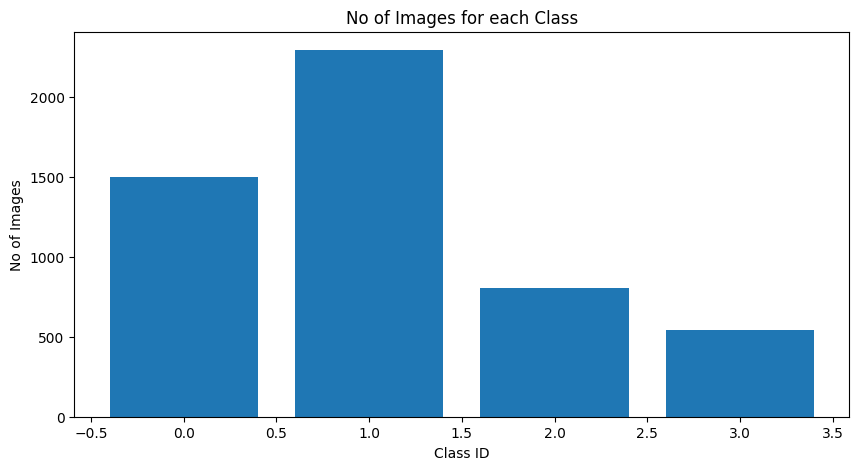

In [24]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfclasses),numofSamples)
plt.title('No of Images for each Class')
plt.xlabel("Class ID")
plt.ylabel("No of Images")
plt.show()

<Axes: ylabel='count'>

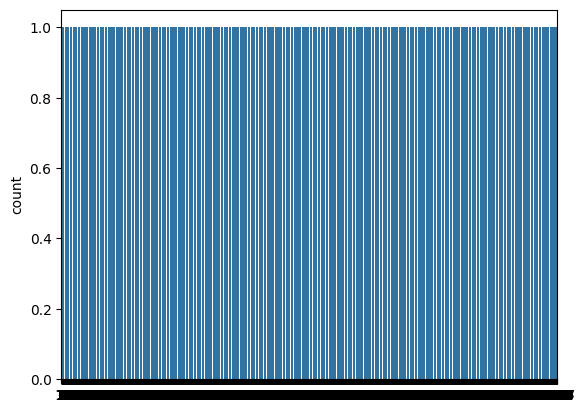

In [23]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import seaborn as sns
X_trainShape = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
X_trainFlat = x_train.reshape(x_train.shape[0], X_trainShape)
Y_train = y_train
ros = RandomUnderSampler()
X_trainRos, Y_trainRos = ros.fit_resample(X_trainFlat, Y_train)
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 4)
# Make Data 2D again
for i in range(len(X_trainRos)):
    height, width, channels = image_size[0],image_size[1],3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
# Plot Label Distribution
dfRos = pd.DataFrame()
dfRos["labels"]=Y_trainRos
labRos = dfRos['labels']
sns.countplot(labRos)

In [25]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

In [26]:
del x_train
del y_train

In [27]:
x_train = np.array(list(map(preProcessing,X_trainRosReshaped)))
print(x_train[0].shape)

(128, 128)


In [28]:
x_test = np.array(list(map(preProcessing,x_test)))
print(x_test[0].shape)

(128, 128)


In [29]:
x_validation = np.array(list(map(preProcessing,x_val)))
print(x_validation[0].shape)

(128, 128)


In [30]:
print(x_train.shape)

(2168, 128, 128)


In [31]:
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print(X_train.shape)

(2168, 128, 128, 1)


In [32]:
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
X_validation = x_validation.reshape(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1)

In [33]:
del x_test
del x_train
del x_validation

In [34]:
y_train = to_categorical(Y_trainRos,noOfclasses)
y_test = to_categorical(y_test,noOfclasses)
y_validation = to_categorical(y_val,noOfclasses)

In [35]:
class CustomCallback(tf.keras.callbacks.Callback):
  def __init__(self,fraction):
    super(CustomCallback,self).__init__()
    self.fraction = fraction
    self.train_a = [];
    self.val_a =[];

    with open('log.txt','w') as f:
      f.write('Starting of logging..\n')

    self.fig = plt.figure(figsize=(4,3))
    self.ax = plt.subplot(1,1,1)
    plt.ion()

  def on_train_begin(self,logs=None):
    self.fig.show()
    self.fig.canvas.draw()

  def on_train_end(self,logs=None):
    with open('log.txt','a') as f:
      f.write('End of logging..\n')
  def on_epoch_begin(self,epoch,logs=None):
    lr= tf.keras.backend.get_value(self.model.optimizer.lr)
    lr *= self.fraction
    tf.keras.backend.set_value(self.model.optimizer.lr,lr)
    with open('log.txt','a') as f:
      f.write('At epoch {:02d}, learning rate changed to {:.4f}\n'.format(epoch,lr))
  def on_epoch_end(self,epoch,logs=None):
    val_acc = logs.get('val_accuracy')
    train_acc = logs.get('accuracy')
    self.train_a.append(train_acc)
    self.val_a.append(val_acc)
    with open('log.txt','a') as f:
        f.write('At epoch {:02d}, training accuracy: {:.3f}, validation accuracy: {:.3f}\n'.format(epoch,train_acc,val_acc))
    self.ax.clear()
    self.ax.plot(range(1+epoch),self.train_a,label="Training")
    self.ax.plot(range(1+epoch),self.val_a,label="Validation")
    self.ax.set_xlabel('Epochs')
    self.ax.set_ylabel('Accuracy')
    self.ax.legend()
    self.fig.canvas.draw()
    self.fig.show()

In [36]:
def model():
  filters=60
  sizeoffilter1 = (5,5)
  sizeoffilter2 = (4,4)
  sizeoffilter3 = (3,3)
  sizeofpool = (2,2)
  node=5000

  model = Sequential();
  model.add((Conv2D(filters,sizeoffilter1,input_shape=(image_size[0],image_size[1],1)
  ,activation="relu")))

  model.add((Conv2D(filters,sizeoffilter1,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Conv2D(filters,sizeoffilter1,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Conv2D(filters,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add((Conv2D(filters//2,sizeoffilter3,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter3,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(node,activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(noOfclasses,activation="softmax"))

  model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

  return model

model=model()

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 60)      1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 60)      90060     
                                                                 
 conv2d_2 (Conv2D)           (None, 117, 117, 30)      28830     
                                                                 
 conv2d_3 (Conv2D)           (None, 114, 114, 30)      14430     
                                                                 
 max_pooling2d (MaxPooling2  (None, 57, 57, 30)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 57, 57, 30)        0         
                                                        

In [38]:
def simple_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(noOfclasses, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the simple model
simple_cnn_model = simple_model()


In [39]:
simple_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [40]:
def improved_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout to reduce overfitting
    model.add(Dense(128, activation='relu'))
    model.add(Dense(noOfclasses, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the improved model
improved_cnn_model = improved_model()




In [41]:
improved_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 115200)            0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Epoch 1/30
9/9 [==============================] - 60s 7s/step - loss: 318.9566 - accuracy: 0.2565 - val_loss: 6.3179 - val_accuracy: 0.2500
Epoch 2/30
9/9 [==============================] - 53s 6s/step - loss: 2.7431 - accuracy: 0.2906 - val_loss: 1.7363 - val_accuracy: 0.2500
Epoch 3/30
9/9 [==============================] - 56s 6s/step - loss: 1.3629 - accuracy: 0.3432 - val_loss: 1.4597 - val_accuracy: 0.2500
Epoch 4/30
9/9 [==============================] - 53s 6s/step - loss: 1.3396 - accuracy: 0.3432 - val_loss: 1.4352 - val_accuracy: 0.2500
Epoch 5/30
9/9 [==============================] - 58s 7s/step - loss: 1.3279 - accuracy: 0.3685 - val_loss: 1.4529 - val_accuracy: 0.2500
Epoch 6/30
9/9 [==============================] - 52s 6s/step - loss: 1.2865 - accuracy: 0.4340 - val_loss: 1.4473 - val_accuracy: 0.2500
Epoch 7/30
9/9 [==============================] - 56s 6s/step - loss: 1.1600 - accuracy: 0.5387 - val_loss: 1.5067 - val_accuracy: 0.2500
Epoch 8/30
9/9 [================

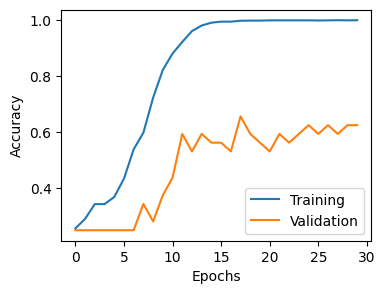

In [ ]:
history = simple_cnn_model.fit(X_train,Y_trainRosHot,epochs=30,validation_data =(X_validation,y_validation) ,batch_size=256,
                    shuffle=True,
                    max_queue_size=20,
                    use_multiprocessing=True,
                    workers=1,
                   callbacks=[CustomCallback(fraction=0.9)])

Epoch 1/30
9/9 [==============================] - 149s 16s/step - loss: 78.7788 - accuracy: 0.2809 - val_loss: 1.6181 - val_accuracy: 0.2812
Epoch 2/30
9/9 [==============================] - 141s 16s/step - loss: 1.3808 - accuracy: 0.3321 - val_loss: 1.3828 - val_accuracy: 0.3438
Epoch 3/30
9/9 [==============================] - 143s 16s/step - loss: 1.2917 - accuracy: 0.4363 - val_loss: 1.4370 - val_accuracy: 0.3438
Epoch 4/30
9/9 [==============================] - 141s 16s/step - loss: 1.1161 - accuracy: 0.5415 - val_loss: 1.4150 - val_accuracy: 0.3438
Epoch 5/30
9/9 [==============================] - 143s 16s/step - loss: 0.9162 - accuracy: 0.6370 - val_loss: 1.3530 - val_accuracy: 0.4375
Epoch 6/30
9/9 [==============================] - 140s 16s/step - loss: 0.7408 - accuracy: 0.7269 - val_loss: 1.4428 - val_accuracy: 0.3750
Epoch 7/30
9/9 [==============================] - 145s 16s/step - loss: 0.5580 - accuracy: 0.7943 - val_loss: 1.5113 - val_accuracy: 0.3438
Epoch 8/30
9/9 [===

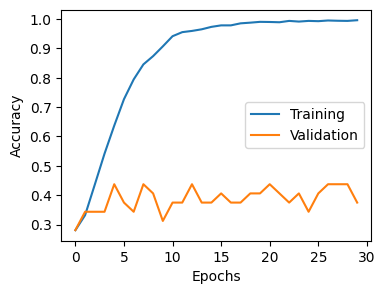

In [ ]:
history = improved_cnn_model.fit(X_train,Y_trainRosHot,epochs=30,validation_data =(X_validation,y_validation) ,batch_size=256,
                    shuffle=True,
                    max_queue_size=20,
                    use_multiprocessing=True,
                    workers=1,
                   callbacks=[CustomCallback(fraction=0.9)])

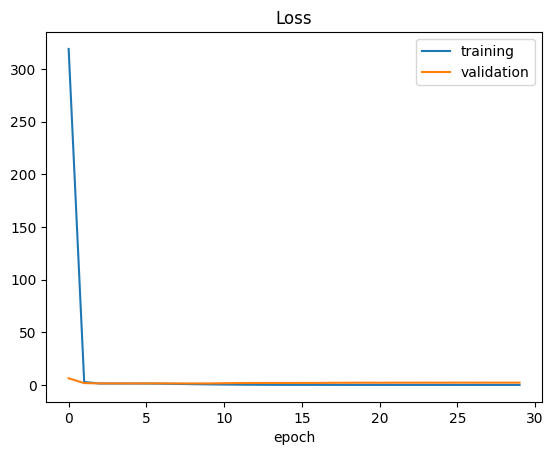

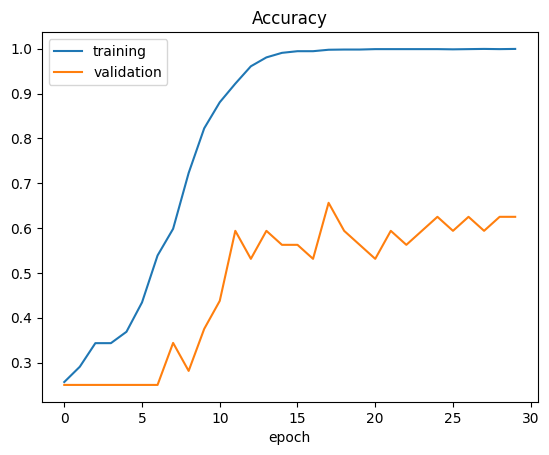

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

Epoch 1/20
9/9 [==============================] - 979s 107s/step - loss: 1.4446 - accuracy: 0.2620 - val_loss: 1.3809 - val_accuracy: 0.2812
Epoch 2/20
9/9 [==============================] - 921s 101s/step - loss: 1.3632 - accuracy: 0.2984 - val_loss: 1.3544 - val_accuracy: 0.5000
Epoch 3/20
9/9 [==============================] - 911s 101s/step - loss: 1.3295 - accuracy: 0.3649 - val_loss: 1.2998 - val_accuracy: 0.4375
Epoch 4/20
9/9 [==============================] - 904s 100s/step - loss: 1.2335 - accuracy: 0.4340 - val_loss: 0.9803 - val_accuracy: 0.5625
Epoch 5/20
9/9 [==============================] - 915s 101s/step - loss: 1.1379 - accuracy: 0.5023 - val_loss: 0.9676 - val_accuracy: 0.7188
Epoch 6/20
9/9 [==============================] - 919s 101s/step - loss: 1.0067 - accuracy: 0.5816 - val_loss: 0.7997 - val_accuracy: 0.6562
Epoch 7/20
9/9 [==============================] - 914s 101s/step - loss: 0.9171 - accuracy: 0.5996 - val_loss: 0.8094 - val_accuracy: 0.7188
Epoch 8/20
9/

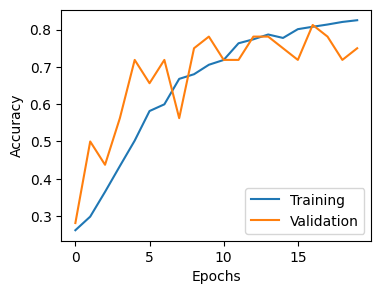

In [42]:
history = model.fit(X_train,Y_trainRosHot,epochs=20,validation_data =(X_validation,y_validation) ,batch_size=256,
                    shuffle=True,
                    max_queue_size=20,
                    use_multiprocessing=True,
                    workers=1,
                   callbacks=[CustomCallback(fraction=0.9)])

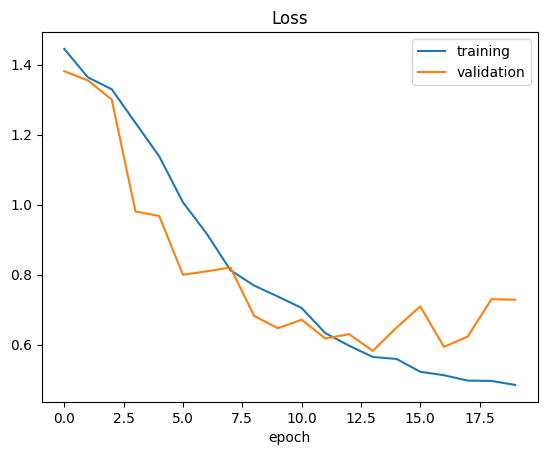

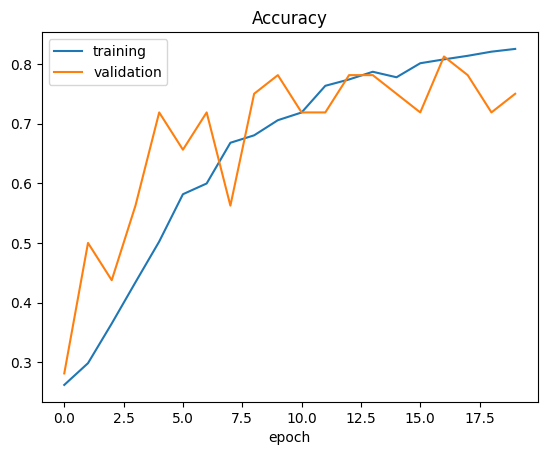

In [43]:
plt.figure(3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [44]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy = ',score[1])

Test Score =  0.5700585842132568
Test Accuracy =  0.7778925895690918


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Preprocess data for SVM
X_train_svm = X_train.reshape(X_train.shape[0], -1)
X_test_svm = X_test.reshape(X_test.shape[0], -1)

# Scale pixel values
X_train_svm = X_train_svm / 255.0
X_test_svm = X_test_svm / 255.0

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_svm, Y_trainRos)

# Make predictions
y_pred = svm_model.predict(X_test_svm)

# Convert y_pred to one-hot encoded format
lb = LabelBinarizer()
y_pred_one_hot = lb.fit_transform(y_pred)

# Evaluate the model using one-hot encoded y_pred
accuracy = accuracy_score(y_test, y_pred_one_hot)
print('SVM Accuracy:', accuracy)


SVM Accuracy: 0.45764462809917356


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Preprocess data for Naive Bayes
X_train_nb = X_train.reshape(X_train.shape[0], -1)
X_test_nb = X_test.reshape(X_test.shape[0], -1)

# Ensure pixel values are non-negative
X_train_nb = X_train_nb.astype('float32')
X_test_nb = X_test_nb.astype('float32')

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_nb, Y_trainRos)

# Make predictions
y_pred = nb_model.predict(X_test_nb)

# Convert y_pred to one-hot encoded format
lb = LabelBinarizer()
y_pred_one_hot = lb.fit_transform(y_pred)

# Evaluate the model using one-hot encoded y_pred
accuracy = accuracy_score(y_test, y_pred_one_hot)
print('Naive Bayes Accuracy:', accuracy)


Naive Bayes Accuracy: 0.29338842975206614


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Preprocess data for Decision Tree
X_train_dt = X_train.reshape(X_train.shape[0], -1)
X_test_dt = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_dt, Y_trainRos)

# Make predictions
y_pred = dt_model.predict(X_test_dt)

# Convert y_pred to one-hot encoded format
lb = LabelBinarizer()
y_pred_one_hot = lb.fit_transform(y_pred)

# Evaluate the model using one-hot encoded y_pred
accuracy = accuracy_score(y_test, y_pred_one_hot)
print('Decision Tree Accuracy:', accuracy)


Decision Tree Accuracy: 0.381198347107438
